In [75]:
#Importing data from csv
from pandas import read_csv
import pandas as pd

protoss_data = read_csv('../Output/ProtossFeb.csv', header=0, index_col=False)
display(protoss_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,...,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,win
0,1,World of Sleepers LE,us,437,P,T,0.0,1,0,Player 2 - Harstem (Protoss),...,0,0,0,0,0,0,0,0,0,0
1,1,World of Sleepers LE,us,437,P,T,310.8,480,30,Player 2 - Harstem (Protoss),...,0,0,0,0,0,0,0,0,0,0
2,1,World of Sleepers LE,us,437,P,T,366.8,960,60,Player 2 - Harstem (Protoss),...,0,0,0,0,0,0,0,0,0,0
3,1,World of Sleepers LE,us,437,P,T,296.8,1440,90,Player 2 - Harstem (Protoss),...,0,0,0,0,0,0,1,0,0,0
4,1,World of Sleepers LE,us,437,P,T,305.2,1920,120,Player 2 - Harstem (Protoss),...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76362,3445,Eternal Empire LE,eu,768,P,T,291.2,14880,930,Player 2 - PtitDrogo (Protoss),...,8,0,0,1,1,0,8,0,10,0
76363,3445,Eternal Empire LE,eu,768,P,T,324.8,15360,960,Player 2 - PtitDrogo (Protoss),...,14,0,0,1,1,0,8,0,7,0
76364,3445,Eternal Empire LE,eu,768,P,T,280.0,15840,990,Player 2 - PtitDrogo (Protoss),...,14,0,0,1,1,0,8,0,9,0
76365,3445,Eternal Empire LE,eu,768,P,T,53.2,16320,1020,Player 2 - PtitDrogo (Protoss),...,12,0,0,1,1,0,8,0,12,0


In [76]:
#Standardization

from sklearn.preprocessing import StandardScaler

no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(protoss_data) if x not in no_standardize]

#Standardizing these columns
stand = protoss_data[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
protoss_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=protoss_data.index)

#One-hot Encoding the categorical variables
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(protoss_data['map_name'], prefix='Map'))
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(protoss_data['region'], prefix='Region'))
protoss_data_standardized = protoss_data_standardized.join(pd.get_dummies(protoss_data['enemy_race'], prefix='Enemy'))
protoss_data_standardized = protoss_data_standardized.join(protoss_data['win'])

#Displaying first and last 5 rows
display(protoss_data_standardized.head(5), protoss_data_standardized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_포트 알렉산더 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
0,-2.547693,-1.444397,-1.203894,-1.134872,-0.481827,-2.105077,-1.391898,-1.122629,-0.898177,-0.452576,...,0,0,0,0,0,1,0,1,0,0
1,0.395538,-1.394919,-1.167338,-1.134872,-0.481827,-1.121683,-1.002625,-1.113884,-0.898177,-0.452576,...,0,0,0,0,0,1,0,1,0,0
2,0.925850,-1.295964,-1.130782,-1.024877,-0.387567,-0.932308,-1.067504,-1.078903,-0.898177,-0.452576,...,0,0,0,0,0,1,0,1,0,0
3,0.262960,-1.147530,-1.075948,-1.024877,-0.358564,-0.818684,-0.872868,-1.039549,-0.898177,-0.452576,...,0,0,0,0,0,1,0,1,0,0
4,0.342507,-1.098052,-1.057670,-1.024877,-0.460074,-0.894433,0.165194,-1.030804,-0.898177,-0.452576,...,0,0,0,0,0,1,0,1,0,0


,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_포트 알렉산더 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
76362,0.209929,0.732626,0.642182,0.597538,0.163488,0.809936,0.230073,0.552082,0.580203,0.615070,...,0,0,0,1,0,0,0,1,0,0
76363,0.528116,0.732626,0.861517,0.597538,-0.394818,0.885686,0.943740,0.635162,0.816247,0.659555,...,0,0,0,1,0,0,0,1,0,0
76364,0.103866,0.732626,1.062575,0.597538,-0.365815,0.582687,0.878861,0.748850,0.915634,0.674383,...,0,0,0,1,0,0,0,1,0,0
76365,-2.043897,0.683148,1.080853,0.597538,0.061978,0.620562,-1.391898,0.884401,1.251064,0.737404,...,0,0,0,1,0,0,0,1,0,0
76366,-2.547693,0.683148,0.057286,0.597538,0.279500,0.847811,-1.391898,0.346569,-0.277009,1.282349,...,0,0,0,1,0,0,0,1,0,0


In [77]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(protoss_data_standardized) if x not in no_X]

Y = protoss_data_standardized['win']
X_standardized = protoss_data_standardized[yes_X]

In [78]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(protoss_data_standardized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)


Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]


X_standardized_train = X_standardized[0:num_train]
X_standardized_val = X_standardized[num_train:(num_train + num_val)]
X_standardized_test = X_standardized[(num_val + num_train):]

In [79]:
X_train = protoss_data_standardized[0:num_train]
X_val = protoss_data_standardized[num_train:(num_train + num_val)]
X_test = protoss_data_standardized[(num_val + num_train):]

In [80]:
Y_train.shape

(48875,)

In [81]:
X_train.shape

(48875, 124)

In [82]:
import numpy as np

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=X_train, val_df=X_val, test_df=X_test,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [83]:
w1 = WindowGenerator(input_width=15, label_width=15, shift=1,
                     label_columns=['win'])
w1

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']

In [84]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [85]:
import tensorflow as tf
tf.random.set_seed(1111)

# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(protoss_data_standardized[:w1.total_window_size])])



example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (1, 16, 124)
Inputs shape: (1, 15, 124)
labels shape: (1, 15, 1)


In [86]:
import matplotlib.pyplot as plt

def plot(self, model=None, plot_col='win', max_subplots=1):
  inputs, labels = self.example
  plt.figure(figsize=(20,15))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [standardized]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time Step')

WindowGenerator.plot = plot

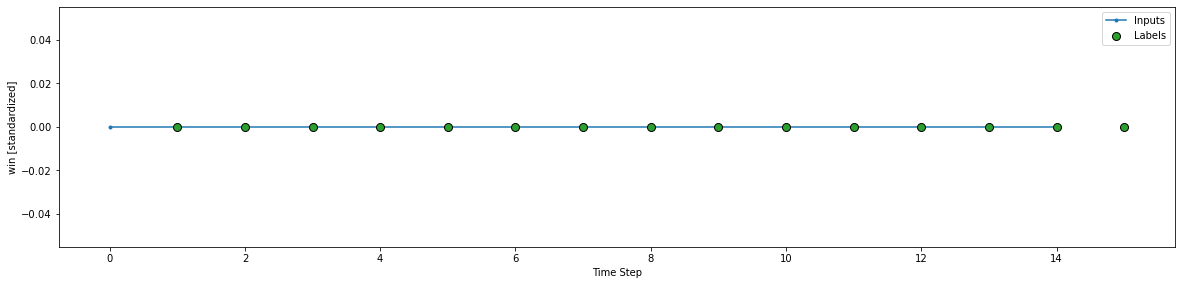

In [87]:
w1.example = example_inputs, example_labels
w1.plot()

In [88]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [89]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [90]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['win'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['win']

In [91]:
wide_window = WindowGenerator(
    input_width=15, label_width=15, shift=1,
    label_columns=['win'])

wide_window

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']

In [92]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [93]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [94]:
val_performance = {}
performance = {}

history = compile_and_fit(linear, wide_window)

val_performance['Linear'] = linear.evaluate(wide_window.val)
performance['Linear'] = linear.evaluate(wide_window.test, verbose=0)

Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/50
1527/1527 [======================

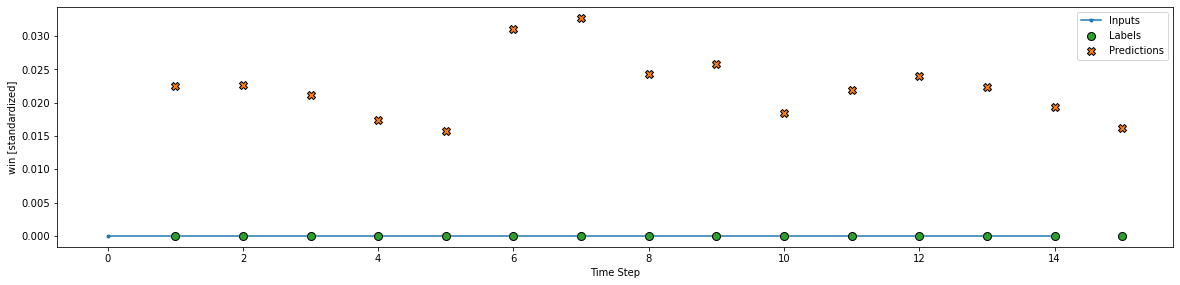

In [95]:
#Linear

wide_window.plot(linear)

In [96]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=131, activation='sigmoid'),
    tf.keras.layers.Dense(units=65, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

history = compile_and_fit(dense, wide_window)

val_performance['Dense'] = dense.evaluate(wide_window.val)
performance['Dense'] = dense.evaluate(wide_window.test, verbose=0)

Epoch 1/50
1527/1527 [==============================] - 3s 2ms/step - loss: 0.1709 - binary_accuracy: 0.9418 - val_loss: 0.0542 - val_binary_accuracy: 0.9842
Epoch 2/50
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0430 - binary_accuracy: 0.9846 - val_loss: 0.0426 - val_binary_accuracy: 0.9840
Epoch 3/50
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0390 - binary_accuracy: 0.9847 - val_loss: 0.0419 - val_binary_accuracy: 0.9841
Epoch 4/50
1527/1527 [==============================] - 3s 2ms/step - loss: 0.0371 - binary_accuracy: 0.9847 - val_loss: 0.0428 - val_binary_accuracy: 0.9838
Epoch 5/50
382/382 [==============================] - 1s 1ms/step - loss: 0.0428 - binary_accuracy: 0.9840


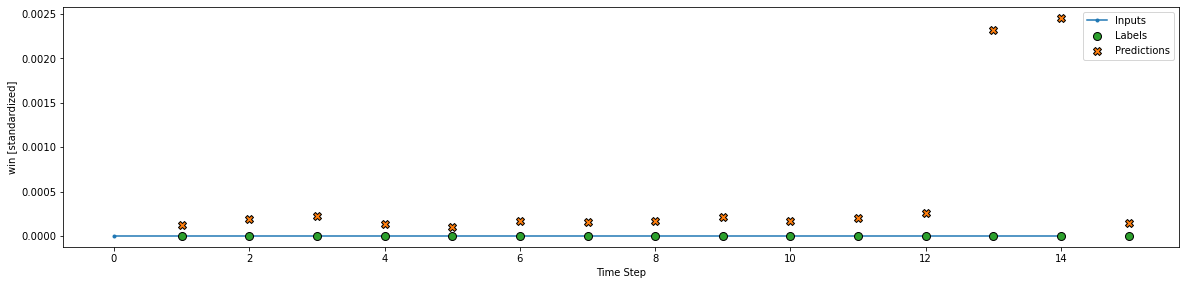

In [97]:
#Dense

wide_window.plot(dense)

In [98]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [99]:
history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/50
1527/1527 [==============================] - 7s 5ms/step - loss: 0.1217 - binary_accuracy: 0.9646 - val_loss: 0.0527 - val_binary_accuracy: 0.9834
Epoch 2/50
1527/1527 [==============================] - 7s 5ms/step - loss: 0.0377 - binary_accuracy: 0.9863 - val_loss: 0.0479 - val_binary_accuracy: 0.9817
Epoch 3/50
1527/1527 [==============================] - 7s 5ms/step - loss: 0.0269 - binary_accuracy: 0.9897 - val_loss: 0.0547 - val_binary_accuracy: 0.9794
Epoch 4/50
382/382 [==============================] - 1s 2ms/step - loss: 0.0648 - binary_accuracy: 0.9789


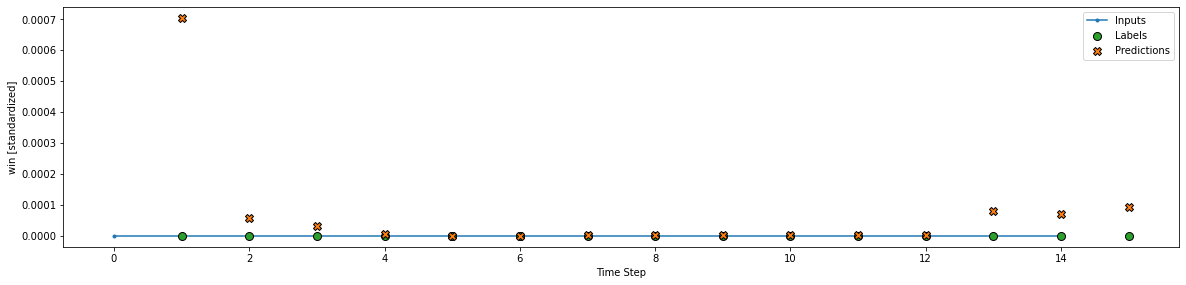

In [100]:
#LSTM

wide_window.plot(lstm_model)

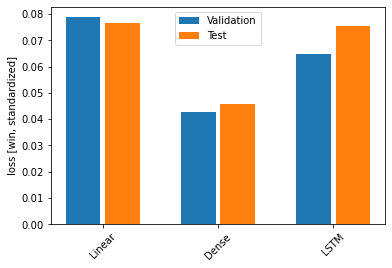

In [101]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, standardized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()